In [11]:
import cv2
import requests # For reading image from URL
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image
import os

In [12]:
def download_image_from_url(url):
    filename, ext = url.split("/")[-1].split(".")
    # Send an HTTP GET request to the URL
    response = requests.get(url)
    # Check if the request was successful (status code 200 indicates success)
    if response.status_code == 200:
        # Get the content of the response (the image data)
        image_data = response.content
        # Specify the path where you want to save the image
        save_path = f"{filename}.{ext}"  # Replace with the desired file name and location
        # Open a binary file in write mode and write the image data to it
        with open(save_path, "wb") as file:
            file.write(image_data)
        print(f"Image downloaded and saved as {save_path}")
        return cv2.imread(save_path)
    else:
        print(f"Failed to download the image. Status code: {response.status_code}")

<hr>
<div dir=rtl>

<h3><font face="B Mitra" size=5><b>تمرین 1: بخش اول</b></font></h3>

<font face="B Mitra" size=4>
تصویر PNG یک سگ جذاب در متغیری برای شما قرار داده شده است. ضمن تبدیل این تصویر به فرمت JPEG. این دو فایل را از لحاظ کیفیت تصویر و حجم  فایل مقایسه کنید.
</font>

Image downloaded and saved as png-transparent-dog-walking-pet-sitting-dog-food-dog-animals-pet-dog-like-mammal.png


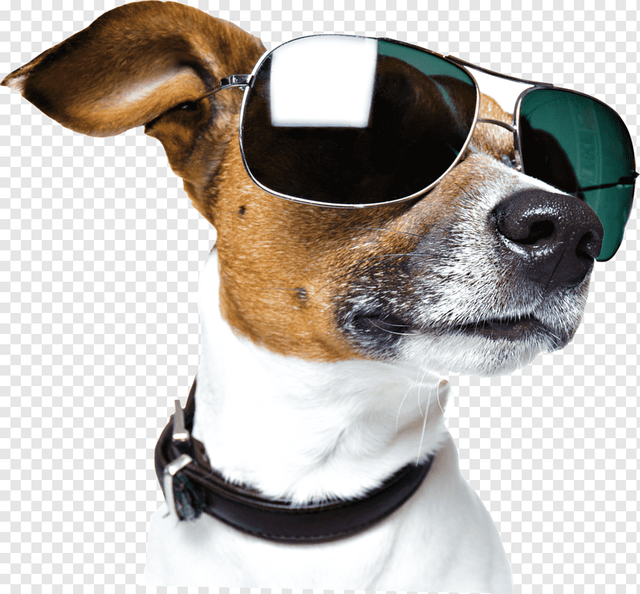

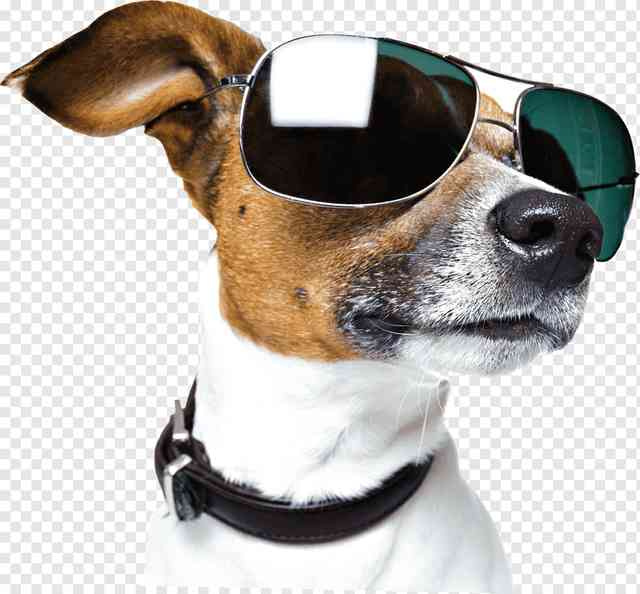

PNG File Size: 497202 bytes
JPEG File Size: 31930 bytes
PSNR between PNG and JPEG images: 30.506773033436502


In [13]:
# Load the input image
cute_dog_image_png = download_image_from_url("https://i.ibb.co/3vfcz9Y/png-transparent-dog-walking-pet-sitting-dog-food-dog-animals-pet-dog-like-mammal.png")

# Display the original PNG image
cv2_imshow(cute_dog_image_png)

# Convert the PNG image to JPEG format with a specified quality (e.g., 30)
jpeg_image_path = "cute_dog_image.jpg"
cv2.imwrite(jpeg_image_path, cute_dog_image_png, [int(cv2.IMWRITE_JPEG_QUALITY), 30])

# Read and display the converted JPEG image
cute_dog_image_jpeg = cv2.imread(jpeg_image_path)
cv2_imshow(cute_dog_image_jpeg)

# Compare image quality and file size
png_file_size = os.path.getsize("png-transparent-dog-walking-pet-sitting-dog-food-dog-animals-pet-dog-like-mammal.png")
jpeg_file_size = os.path.getsize(jpeg_image_path)

print(f"PNG File Size: {png_file_size} bytes")
print(f"JPEG File Size: {jpeg_file_size} bytes")

# Optionally, you can compare the PSNR (Peak Signal-to-Noise Ratio) between the two images for quality assessment
psnr_value = cv2.PSNR(cute_dog_image_png, cute_dog_image_jpeg)
print(f"PSNR between PNG and JPEG images: {psnr_value}")

According to the comparison, PNG occupies more space and has better quality than JPEG.

<hr>
<font face="B Mitra" size=4>
<div dir=rtl>


<p><font size = 5><b>تمرین ۱: بخش دوم</b></font></p>

<li>
فرض کنید می‌خواهید چندین فایل تصویری را در یک فایل ذخیره کنید. از چه فرمتی استفاده خواهید کرد؟ به عنوان مثال،
فرض کنید می‌خواهید تصویر کارت‌ ملی و شناسنامه خود را در قالب یک فایل برای فردی بفرستید. تصاویر مربوطه برای شما در متغیرهای shenasname_image و melli_image ذخیره شده‌ند. فایل نهایی را در فرمت مناسب تولید کنید. </li>

</font>

Image downloaded and saved as shenasname.jpg
Image downloaded and saved as melli-fake.jpg


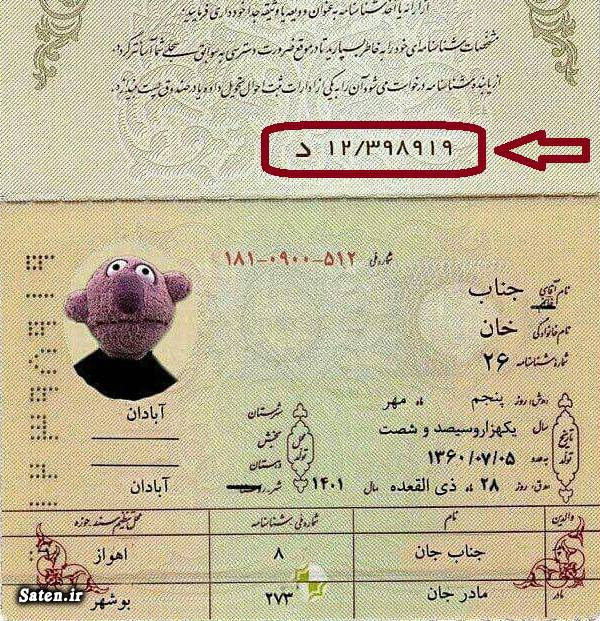

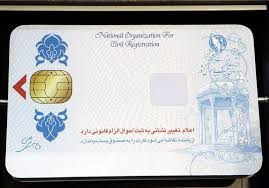

Your file has been successfully saved


In [14]:
# multi-page document format
# Your code goes here
!pip install imageio[ffmpeg]

import imageio
import cv2
from PIL import Image
from io import BytesIO
import requests

# Download the images
shenasname_image = download_image_from_url('https://i.ibb.co/6vqyJt5/shenasname.jpg')
melli_image = download_image_from_url("https://i.ibb.co/xj0skgs/melli-fake.jpg")

# Display the images
cv2_imshow(shenasname_image)
cv2_imshow(melli_image)

matrix_list=[shenasname_image,melli_image]

#matrix of images
def matrix_of_images(matrix_list):
      # Determine the maximum number of columns among the matrices
    max_columns = max(matrix.shape[1] for matrix in matrix_list)
      # Determine the total number of rows in the larger matrix
    total_rows = sum(matrix.shape[0] for matrix in matrix_list)
    #fill the matrix with 255 so that the empty spaces are shown in white=(255,255,255)
    larger_matrix = np.full((total_rows, max_columns, 3), 255, dtype=np.uint8)
      # Place the smaller matrices into the larger matrix
    current_row = 0
    for matrix in matrix_list:
        rows, columns = matrix.shape[:2]
        larger_matrix[current_row:current_row+rows, :columns] = matrix
        current_row += rows
    # Swap color channels from RGB to GBR
    image_array_gbr = larger_matrix[..., ::-1]
    image_gbr = Image.fromarray(image_array_gbr)
    image_gbr.save('multi_page.tiff',format='TIFF')
    print("Your file has been successfully saved")
    # from google.colab import files
    # # Download the multi-page TIFF file
    # files.download('multi_page.tiff')

matrix_of_images(matrix_list)

We use the Multi-page TIFF (.tiff) format because, according to the textbook, it has the ability to save several images in one file.

<hr>
<font face="B Mitra" size=4>
<div dir=rtl>


<p><font size = 5><b>تمرین ۱: بخش سوم</b></font></p>

<li>فرض کنید چند تصویر بامزه در گالری گوشی خود از دوستتان پیدا کردید و می‌خواهید یک گیف مناسب برای ایشان درست کنید. پس از اجرای سلول زیر(به کدهای داخل آن توجه نکنید)،یک فولدر به نام for_gif که شامل تعداد تصویر با فرمت JPEG است برای شما ایجاد می‌شود، فایل نهایی با فرمت GIF را تولید کنید. </li>
</font>

In [ ]:
!pip install gdown
import gdown
file_id = '1SSaoE9TGODHFXiB9qq4n3eLbkgwhN9DO'
url = f"https://drive.google.com/uc?id={file_id}"
gdown.download(url, 'for_gif.zip')
!unzip  "/content/for_gif.zip"

Downloading...
From: https://drive.google.com/uc?id=1SSaoE9TGODHFXiB9qq4n3eLbkgwhN9DO
To: /content/for_gif.zip
100%|██████████| 3.77M/3.77M [00:00<00:00, 86.9MB/s]


Archive:  /content/for_gif.zip
replace content/for_gif/output_0100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!pip install Pillow
from PIL import Image

# Path to the folder containing JPEG images
jpeg_images_folder = "/content/for_gif"

# List all JPEG files in the folder
jpeg_files = [f for f in os.listdir(jpeg_images_folder) if f.endswith(".jpg")]

# Sort the files to maintain order in the GIF
jpeg_files.sort()

# Create a list to store image paths
image_paths = [os.path.join(jpeg_images_folder, img) for img in jpeg_files]

# Output GIF file path
output_gif_path = "/content/output.gif"

# Create GIF using Pillow
images = [Image.open(image_path) for image_path in image_paths]
images[0].save(output_gif_path, save_all=True, append_images=images[1:], duration=500, loop=0)

# Display the GIF file path
print(f"GIF created and saved as: {output_gif_path}")

from IPython.display import display, Image

# Path to the saved GIF file
output_gif_path = "/content/output.gif"

# Display the GIF
with open(output_gif_path, "rb") as f:
    display(Image(data=f.read(), format="png"))

<hr>
<div dir=rtl>
<font size = 5>
<b>تمرین ۲</b>
</font>

<font face="B Mitra" size=5>
<div dir=rtl>

<p>
<font size = 5>
برای انجام downsampling روش‌های مختلفی از جمله درون‌یابی، حذف پیکسل‌ها یا میان‌گیری وجود دارد. در این موارد تحقیق کرده و به دلخواه یک روش را روی تصویر پیاده سازی کنید. توجه کنید که در پیاده‌سازی خود از توابع آماده opencv استفاده نکنید.
</font>
</p>

In [ ]:
# Import Image from PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import sys

# Define function to create checkerboard image
def create_checkerboard(width, height, num_squares):

  # Create new black image
  image = Image.new("1", (width, height))

  # Get reference to pixels
  pixels = image.load()

  # Calculate square width
  square_width = width // num_squares

  # Loop through pixels
  for i in range(width):
    for j in range(height):

      # Check if pixel is at intersection of squares
      if (i // square_width) % 2 == (j // square_width) % 2:

        # Make pixel white
        pixels[i, j] = 1

  # Return checkerboard image
  return image

def downsample_nearest_neighbor(image, scale_factor):
    """
    Downsample the input image using nearest-neighbor interpolation.

    Parameters:
    - image: The input image (numpy array).
    - scale_factor: The factor by which to downsample the image.

    Returns:
    - downsampled_image: The downsampled image.
    """
    # Calculate the new dimensions after downsampling
    new_height = int(image.shape[0] / scale_factor)
    new_width = int(image.shape[1] / scale_factor)

    # Initialize the downsampled image with zeros
    downsampled_image = np.zeros((new_height, new_width), dtype=np.uint8)

    # Perform nearest-neighbor interpolation
    for i in range(new_height):
        for j in range(new_width):
            # Calculate the corresponding pixel in the original image
            original_i = int(i * scale_factor)
            original_j = int(j * scale_factor)

            # Copy the pixel value from the original image to the downsampled image
            downsampled_image[i, j] = image[original_i, original_j]

    return downsampled_image

# Create 400x400 checkerboard with 20 squares
original_image = create_checkerboard(400, 400, 20)

# Convert the PIL Image to a NumPy array
original_image = np.array(original_image)

# Set the scale factor for downsampling
scale_factor = 2

# Perform downsampling
downsampled_image = downsample_nearest_neighbor(original_image, scale_factor)

# Display the original and downsampled images
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_image, cmap='gray')  # Use cmap='gray' for binary images
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Downsampled Image')
plt.imshow(downsampled_image, cmap='gray')  # Use cmap='gray' for binary images
plt.axis('off')

plt.show()

print(f"Original image File Size: {sys.getsizeof(original_image)} bytes")
print(f"Downsampled image File Size: {sys.getsizeof(downsampled_image)} bytes")


Downsample the input image using nearest-neighbor interpolation.

    Parameters:
    - image: The input image (numpy array).
    - scale_factor: The factor by which to downsample the image.

    Returns:
    - downsampled_image: The downsampled image.

<hr>
<div dir=rtl>
<font size = 5>
<b>تمرین ۳: OCR</b>
</font>

<font face="B Mitra" size=5>
<div dir=rtl>

<p>
<font size = 5>
همان‌طور که سر کلاس بحث شد. از شما می‌خواهیم تصویر فوق که از یک سند متنی گرفته شده‌است را پردازش کنید و به عنوان خروجی تصویری بدهید که دور هر کاراکتر یک کادر سبز رنگ کشیده شده‌است.
</font>
</p>

<h1>ورودی</h1>
<img src="https://i.ibb.co/QfgzMcQ/text-ocr.png" />

<h1>خروجی مورد نظر</h1>
<img src="https://i.ibb.co/PTjfxrb/ocr-output.png" />

In [ ]:
# Install necessary packages
!apt-get install tesseract-ocr
!pip install pytesseract opencv-python

import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Image URL
image_url = "https://i.ibb.co/QfgzMcQ/text-ocr.png"

# Download the image
image = download_image_from_url(image_url)

# Plot original image
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])
plt.imshow(rgb_img)
plt.title('ORIGINAL IMAGE')
plt.show()

# Get OCR output using Pytesseract
custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

# Plot character boxes on image using pytesseract.image_to_boxes() function
h, w, c = image.shape
boxes = pytesseract.image_to_boxes(image)
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

# Plot the image with green boxes around each character
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('IMAGE WITH CHARACTER LEVEL BOXES')
plt.show()